In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def generate_continous_signal(N, f_s):
    # Consider a continuous signal containing frequency components 1kHz and 2kHz (shifted in phase by 135 degrees relative to the 1kHz)
    # x_input(t) = sin(2pi 1000 t) + 0.5 sin(2pi 2000t + 3pi/4)
    
    t_max = N / f_s
    
    t = np.linspace(0, t_max, 1000)
    x = np.zeros((len(t), ))
    
    for i in range(len(t)):
        x[i] = np.sin(2 * np.pi * 1000 * t[i]) + 0.5 * np.sin(2 * np.pi * 2000 * t[i] + 3 * np.pi / 4)
    return x

def generate_discrete_points(N, f_s):
    # 8-point DFT, i.e., N = 8
    # x(n) = x_input(n t_s) = sin(2pi 1000 n t_s) + 0.5sin(2pi 2000 n t_s + 3pi/4)
    # Assume f_s = 8kHz    
    x = np.zeros((N, ))
    t_s = 1. / f_s
    
    for i in range(N):
        x[i] = np.sin(2 * np.pi * 1000 * i * t_s) + 0.5 * np.sin(2 * np.pi * 2000 * i * t_s + 3 * np.pi / 4)
    
    return x

In [5]:
N = 8
f_s = 8000

x = generate_discrete_points(N, f_s)
# Signal amplitude exists in x(n) at the analysis frequencies of mf_s / N, or 0kHz, 1kHz, ..., 7kHz with f_s = 8000Hz
# The sampled x's are:
x

array([ 0.35355339,  0.35355339,  0.64644661,  1.06066017,  0.35355339,
       -1.06066017, -1.35355339, -0.35355339])

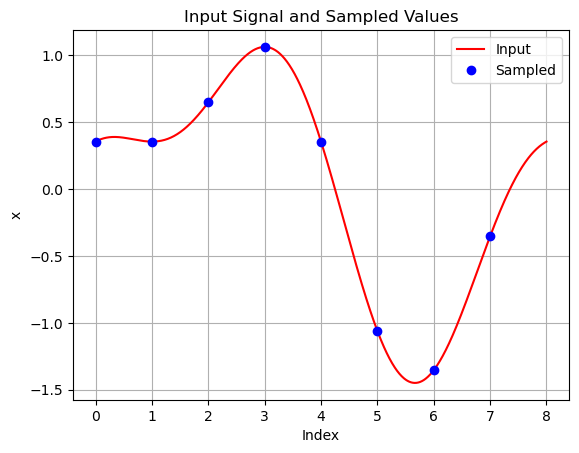

In [6]:
x_input = generate_continous_signal(N, f_s)
index_x = np.arange(0, N)
index_x_input = np.linspace(0, N, len(x_input))


fig, ax = plt.subplots()
ax.plot(index_x_input, x_input, "-", color="red", label="Input")
ax.plot(index_x, x, "o", color="blue", label="Sampled")
ax.set_xlabel("Index")
ax.set_ylabel("x")
ax.grid(True)
ax.legend()
ax.set_title("Input Signal and Sampled Values")
plt.show()

In [15]:
# FFT
# E.g., Case m = 1 or the 1 kHz (m f_s / N = 1 * 8000 / 8) DFT frequency term
# X(1) = \sum^7_{n = 0} x(n) \cos(2 pi n / 8) - j x (n) sin (2 pi n / 8)
X = np.fft.fft(x)
X

array([ 7.77156117e-16+0.00000000e+00j, -9.43689571e-16-4.00000000e+00j,
        1.41421356e+00+1.41421356e+00j, -5.55111512e-17+8.88178420e-16j,
       -5.55111512e-16+0.00000000e+00j, -5.55111512e-17-8.88178420e-16j,
        1.41421356e+00-1.41421356e+00j, -9.43689571e-16+4.00000000e+00j])

In [16]:
# Input x(n) contains a signal component at a frequency of 1kHz (-9.43689571e-16-4.00000000e+00j ~= 0.0 - j4.0 = 4 \angle -90 degrees). Magnitude is 4, PS is 16, and X(1)'s phase angle relative to a 1kHz cosine is -90 degrees
# Input x(n) contains a signal component at a frequency of 2kHz (1.41421356e+00+1.41421356e+00j ~= 1.414 + j1.414 = 2 \angle 45 degrees). Magnitude is 2, PS is 4, and X(1)'s phase angle relative to a 2kHz cosine is 45 degrees

[ 7.77156117e-16+0.00000000e+00j -9.43689571e-16-4.00000000e+00j
  1.41421356e+00+1.41421356e+00j -5.55111512e-17+8.88178420e-16j
 -5.55111512e-16+0.00000000e+00j -5.55111512e-17-8.88178420e-16j
  1.41421356e+00-1.41421356e+00j -9.43689571e-16+4.00000000e+00j]
[  0. -90.  45.   0.   0.   0. -45.  90.]


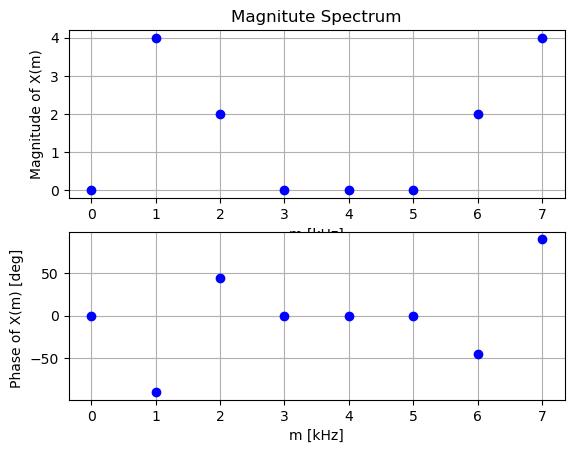

In [24]:
# Plot the X(m) output magnitude and phases as a function of frequency to get the magnitude spectrum of the x(n) input sequence
mag_X = np.abs(X)
phase_X = np.zeros(X.shape)
for i in range(len(X)):
    if (mag_X[i] > 0.1):
        phase_X[i] = np.arctan2(np.imag(X[i]), np.real(X[i]))
    
phase_X = np.rad2deg(phase_X)

fig, ax = plt.subplots(2, 1)
ax[0].plot(mag_X, "o", color="blue")
ax[0].set_xlabel("m [kHz]")
ax[0].set_ylabel("Magnitude of X(m)")
ax[0].grid(True)
ax[0].set_title("Magnitute Spectrum")


ax[1].plot(phase_X, "o", color="blue")
ax[1].set_xlabel("m [kHz]")
ax[1].set_ylabel("Phase of X(m) [deg] ")
ax[1].grid(True)

print(X)
print(phase_X)

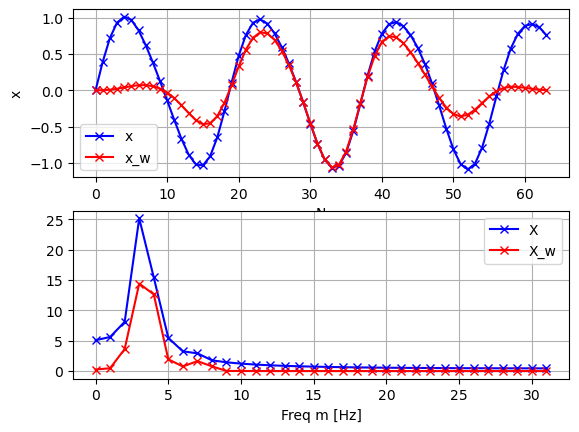

In [12]:
## Example 2: Leak

# Consider 64 samples of 7Hz => t_s = 1 / 7
# Input: 3.4Hz with amplitude 1 and 7Hz with amplitude 0.1 discrete input
# Hanning function: 0.5 - 0.5 cos(2 pi n / 64)

# x(n) = sin(2pi3.4n / 64) + 0.1sin(2pi7n / 64)

def generate_discrete_input_signal(N, f_s):
    
    x = np.zeros((N, ))
    x_w = np.zeros((N, ))
    t_s = 1. / f_s
    
    for i in range(N):
        x[i] = np.sin(2 * np.pi * 3.4 * i / 64 ) + 0.1 * np.sin(2 * np.pi * 7 * i /64)

        w = 0.5 - 0.5 * np.cos(2 * np.pi * i / 64)
        x_w[i] = w * x[i]
    return x, x_w


N = 64
f_s = 7

x, x_w = generate_discrete_input_signal(N, f_s)

X = np.abs(np.fft.fft(x))
X_w = np.abs(np.fft.fft(x_w))

fig, ax = plt.subplots(2, 1)
ax[0].plot(x, "-x", color="blue", label="x")
ax[0].plot(x_w, "-x", color="red", label="x_w")
ax[0].set_ylabel("x")
ax[0].set_xlabel("N")
ax[0].grid(True)
ax[0].legend()

ax[1].plot(X[:32], "-x", color="blue", label="X")
ax[1].plot(X_w[:32], "-x", color="red", label="X_w")
ax[1].set_xlabel("Freq m [Hz]")
ax[1].grid(True)
ax[1].legend()

plt.show()